## **MACHINE LEARNING GROUP PROJECT:**

In [1]:
# Importing library for pandas
import pandas as pd

# Importing library for graph plots
import seaborn as sns
import matplotlib.pyplot as plt

# Importing numpy for mathematical computations
import numpy as np

# Importing packages specific to the model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, BayesianRidge, LassoLarsIC, ElasticNet, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, make_scorer
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

## **EXPLORING DATA AND VISUALIZATIONS**

### Reading the given csv files

Starting with the data files red and white wine given to explore, specifying seperator.

In [2]:
# Reading the csv files
red_wine = pd.read_csv('/Users/stutishekhar/Downloads/wine+quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('/Users/stutishekhar/Downloads/wine+quality/winequality-white.csv', sep=';')

### Printing an overview of the data by specifying its data type by using .info()

**RED WINE FILE:**

In [3]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**WHITE WINE FILE:**

In [4]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### CONCATENATING FILE:

Adding a new column 'Type' as Red and White to both files respectively and then concatenating them

In [5]:
# Adding Red Type to red wine file and White Type to white wine file
red_wine['Type'] = 'Red'
white_wine['Type'] = 'White'

In [6]:
# Concatenating both the files and diplaying first 5 rows
wine_quality = pd.concat([red_wine, white_wine], ignore_index=True)
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [7]:
# Displaying the last five rows of the concatenated files
wine_quality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,White


**OBSERVATIONS:** 
1. The file shows type 'Red' as the first 5 rows and 'White' as the last 5 rows, supporting the concatenation since we joined white after red.

### Printing the size of the file and the structure

The function . size() is used to get the size of the file, and .describe() displays the statistical values for the columns provided.

In [8]:
# Printing size of the file by size()
size = wine_quality.size
print("Size = {}".format(size))

Size = 84461


In [9]:
print(wine_quality.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

### Displaying the unique values of 'Type' in the file

The file suggests having two types of Wine: Red and White

In [10]:
type = wine_quality['Type'].unique()
print("List of Type:", type)

List of Type: ['Red' 'White']


### Displaying the unique values of 'Quality' in the file

The data consists of quality from 3, 4, 5, 6, 7, 8, 9

In [11]:
quality = wine_quality['quality'].unique()
print("List of quality:", quality)

List of quality: [5 6 7 4 8 3 9]


### Defigning function to assign quality level accordingly to the quality provided into 3 levels

Level 1: [3, 4] 

Level 2: [5, 6, 7]

Level 3: [8, 9]

In [12]:
# Function checking if quality is in the list and returning levels accordingly
def quality_assign(quality):
    if quality in [3, 4]:
        return 1
    elif quality in [5, 6, 7]:
        return 2
    elif quality in [8, 9]:
        return 3

# Adding column to the file and printing it
wine_quality['quality_level'] = wine_quality['quality'].apply(quality_assign)

wine_quality.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,quality_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,2


### Displaying the unique values of 'Quality Levels' in the file

In [13]:
level = wine_quality['quality_level'].unique()
print("List of levels:", level)

List of levels: [2 1 3]


### Displaying the file info with data types after adding columns 'Type' and 'level'

In [14]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Type                  6497 non-null   object 
 13  quality_level         6497 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


### ENCODING CATEGORICAL VALUES

The categorical variables are converted into dummy variables, marked 0 or 1. One Hot Encoding with get_dummies() is used to dummy the column diagnosis. drop_first flag helps us avoid multicollinearity.

**OBSERVATION:** The new column is titled 'Type' with False'0' for Red wine and True'1' for White wine.

In [15]:
# Encoding variable and displaying
wine_quality_encoded = pd.get_dummies(wine_quality, columns=['Type'], drop_first=True)
wine_quality_encoded['Type_White'] = np.where(wine_quality_encoded['Type_White'] == True, 1, 0)
wine_quality_encoded = wine_quality_encoded.rename(columns={'Type_White': 'Type'})
wine_quality_encoded.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2,0


### Plotting Correlation Matrix

Correlation Matrix was plotted to check how the variables of type float and int are related to each other. Seaborn Library was used to plot the heatmap, with color tone as warm for better representation.

**INFERENCE:** The matrix suggests high negative correlation between density and alchol, which is dependent on the alchol properties. It also shows positive correlation between sulphur dioxide total and free. However, we can see no correlation between sugar and citric acid, sulphur dioxide and citric acid and so on.

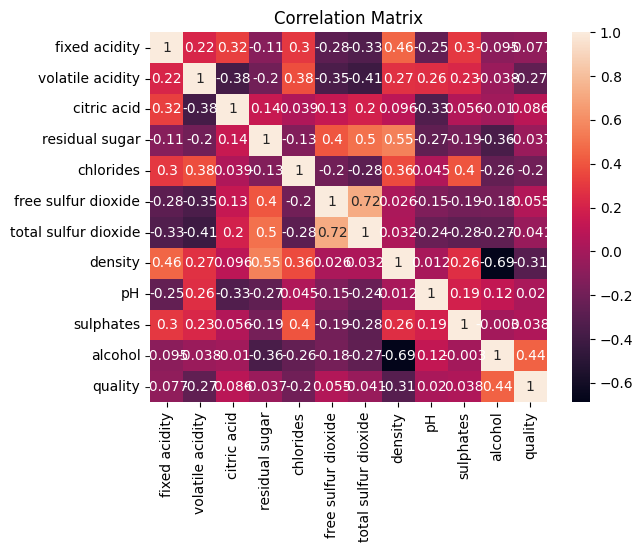

In [16]:
# Including the object variables and plotting matrix for float and int variables
selectedColumns = wine_quality_encoded.select_dtypes(include=['float64','int64']).columns.drop(['quality_level', 'Type'])

corrMatrix = wine_quality_encoded[selectedColumns].corr()

sns.heatmap(corrMatrix, annot = True)
plt.title('Correlation Matrix')
plt.show()

## **VISUALIZING DATA**

### **Visualization 1:** Distribution of Quality Level

Diving into the data, the values provided talks about the type of wines based on several factors provided. One of the attributes is quality which is divided into three bins are named as level 1, 2 and 3.. This helps in understanding how it is spread across Male and Female.

Seaborn Library with catplot() is used to construct the bar plot by specifying kind as Count. To make the visualization look more appealing paletter is changed to 'viridis', and a black edge is also defined.

**INSIGHTS:** The graph infers that of all the combined wines have most of them falls in quality level 2 i.e have a quality of 5, 6 or 7. It also suggests that it is less common in the datset for a high quality wine.

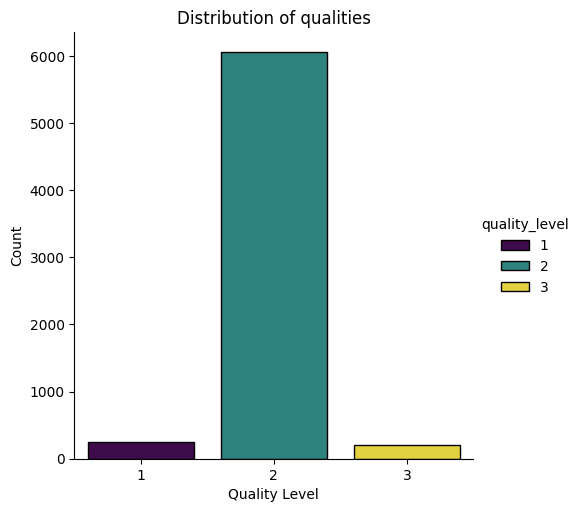

In [17]:
sns.catplot(x='quality_level', kind='count', data = wine_quality_encoded, hue='quality_level', palette = 'viridis', edgecolor='black')
plt.title('Distribution of qualities')
plt.xlabel('Quality Level')
plt.ylabel('Count')
plt.show()

### **Visualization 2:** Distribution across Type

To further check, this distribution among the type of wine was plotted. 

**INSIGHTS:** The graph suggests more number of Type 1, 'White wine' than Type 0 'Red wine' present. The difference is of approx. 5000(1) - 2600(0) = 2400.

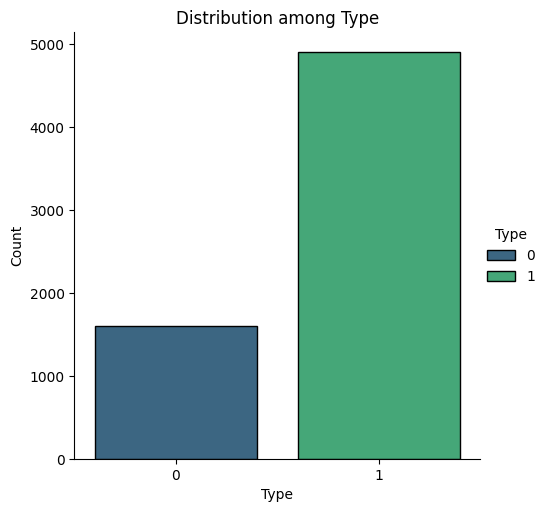

In [18]:
sns.catplot(x='Type', kind='count', data = wine_quality_encoded, hue='Type', palette = 'viridis', edgecolor='black')
plt.title('Distribution among Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### **Visualization 3:** Relationship among Density and alcohol

Now, to check how, Density and Alcohol are affected by each other, a scatterplot for the same was constructed. 'Density' was taken on x-axis, whereas 'Alcohol' on y-axis. 

**INSIGHTS:** The graph suggests a negative linear relationship, however because of the presence of outliers, the behaviour is not observed clearly. 

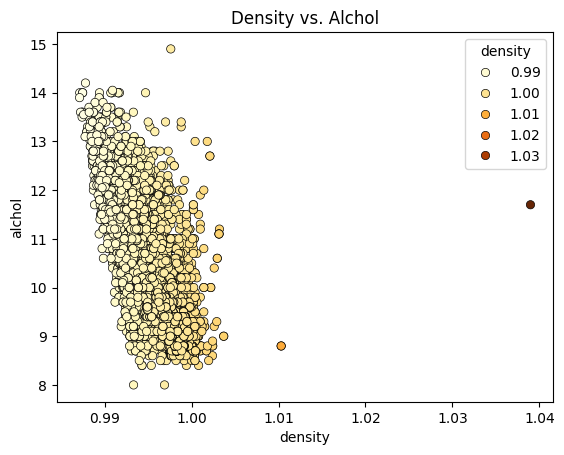

In [19]:
sns.scatterplot(x = 'density', y = 'alcohol', data = wine_quality_encoded, hue='density', palette = 'YlOrBr', edgecolor = 'black')
plt.xlabel('density')
plt.ylabel('alchol')
plt.title('Density vs. Alchol')
plt.show()

### Checking the outliers with high density value and removing them

The higher density values are removed, to check the graph visually better. The index for the values are noted, and the row is then droped from the dataframe. A new dataframe is construvted to plot the graph and check the pattern.

In [20]:
# Sorting density in descending order and extracting the top 5 values
density_values = wine_quality_encoded['density'].nlargest(n = 5) 
density_values_sorted = density_values.sort_values(ascending = False)
print(density_values_sorted)

4380    1.03898
3252    1.01030
3262    1.01030
1434    1.00369
1435    1.00369
Name: density, dtype: float64


In [21]:
wine_quality_encoded_viz = wine_quality_encoded.drop(index=[4380, 3252, 3262])
wine_quality_encoded_viz.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2,0


### Plotting the graph after removing the outliers

**INFERENCE:** The plot shows a negative relation ans suggegst increasing density with lower alchol. This supports the correlation found in the matrix for both the columns.

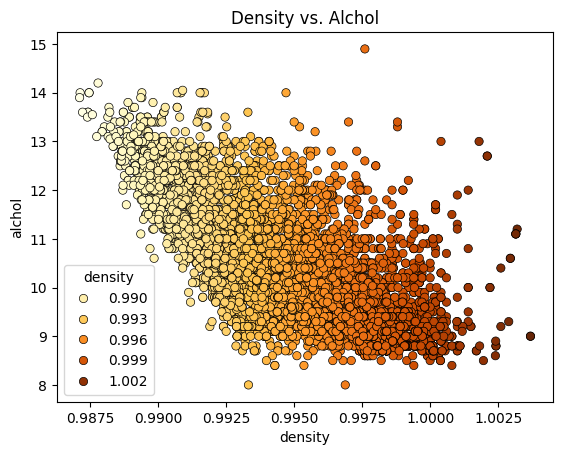

In [22]:
sns.scatterplot(x='density', y='alcohol', data=wine_quality_encoded_viz, hue='density', palette = 'YlOrBr', edgecolor = 'black')
plt.xlabel('density')
plt.ylabel('alchol')
plt.title('Density vs. Alchol')
plt.show()

### **Visualization 4:** Relationship between density and volatile acidity

To look how density varies with acidity, a scatterplot was constructed. 'density' was taken on x-axis, whereas 'volatile acidity' on y-axis.

**INFERENCE:** The graph suggest no specific correlation between the two columns. Interestingly, the data points appears almost evenly distributed across both the attributes.

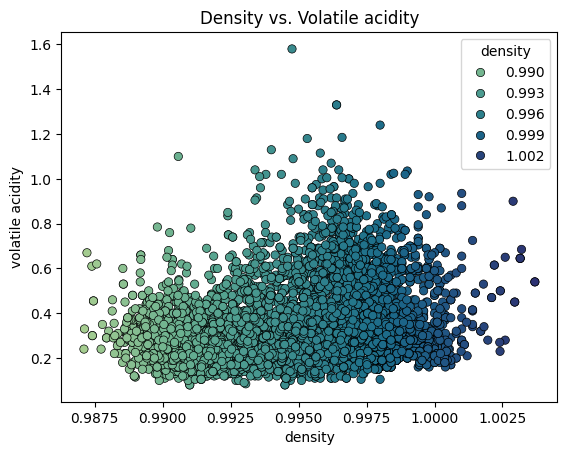

In [23]:
sns.scatterplot(x='density', y='volatile acidity', data=wine_quality_encoded_viz, hue='density', palette = 'crest', edgecolor = 'black')
plt.xlabel('density')
plt.ylabel('volatile acidity')
plt.title('Density vs. Volatile acidity')
plt.show()

### **Visualization 5:** Acidity by Type

To check how Acidity affects Type, a boxplot was created for Unique values of ticket class. The x-axis plots Type with '0' as Red and White as '1' whereas y-axis shows the Acidity.

**INSIGHTS:** The graph infers higher mean age for type 0, and lower mean age for type 1 suggesting higher acidity in Red wine than white. The variance for type 0 appears to be larger than type 1. We could also see numerous outliers present in both the types reflecting inconsistency in data. These outliers if extreme could influence the representation. 

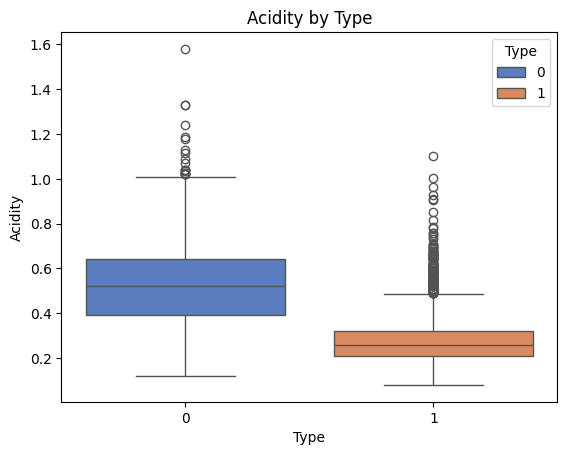

In [24]:
sns.boxplot(x='Type', y='volatile acidity', hue = 'Type', data=wine_quality_encoded, palette = 'muted')
plt.title('Acidity by Type')
plt.xlabel('Type')
plt.ylabel('Acidity')
plt.show()

## **STEP 1:** 
### Starting with discovering how accurately type of wines can be predicted by taking in consideration all the chemical compositions:
---------------------------------------------------------------------------------------------------------------------------------------------

### **LOGISTIC MODEL REGRESSION**

### HANDLING MISSING VALUES:

The missing values are checked using the .isnull() function and .sum() to get the number of null values present. The result suggests no missing values, however according to the type the values could be handld using mean() imputation for quantative datasets, mode for categorical, median imputation and so on.

In [25]:
wine_quality_encoded.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_level           0
Type                    0
dtype: int64

### RUNNING MODEL

For 'x' all independent variables are considered except Column 'Typ_White' and 'quality_level'. 'Type' is used as the dependent variable 'y'. The data is split into 80% training and 20% testing, and logistic regression is run with max_iteration of 3000 to avoid warnings. The Accuracy, confusion matrix and classification report is calculated, where 'zero_division=1' is provided to handle cases with division by zero.

In [26]:
# Initialising the variables and splitting the dataset
y = wine_quality_encoded['Type']
x = wine_quality_encoded.drop(['Type', 'quality_level' ], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
# Fixing iteration to avoid warnings
model = LogisticRegression(max_iter=3000) 

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model.fit(x_train_scaled, y_train)

# Predicting the model
y_pred = model.predict(x_test_scaled)
y_pred

# Printing Accuracy
accuracy = model.score(x_test_scaled, y_test)
print(f'Accuracy of the Logistic model: {accuracy}')

Accuracy of the Logistic model: 0.9892307692307692


In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred, zero_division=1)
print(f'Classification Report:\n{class_report}')

Confusion Matrix:
[[333   8]
 [  6 953]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       341
           1       0.99      0.99      0.99       959

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



**INFERENCE:** The logistic model shows an accuracy of around 98.9%, which suggests that the model correctly predicts 98.9 % of the instances referring to a good model overall. The precision for '0' - Red Wine is 0.98 whereas for '1' - White wine, it is 0.99 which tells that it correctly predicts around 98% of the red wine and 99% of the white wine.

## **STEP 2:** 
### After checking the prediction, decision tree was used to deep dive into figuring few of the important nodes used for splitting the type:
---------------------------------------------------------------------------------------------------------------------------------------------

## **DECISION TREE: WINE TYPE**

To dive into further model decision tree for wine type and quality was checked. Max_depth is given in the DecisionTreeClassifier() to avoid over fitting of the data by growing more branches and capturing noise along.

**PREPARING THE MODEL:** 
1. The categorical value 'Type' was encoded using one hot encoding, where 'Red' and 'White' was labelled for 0 and 1, with dropping the first value for reference and avoiding dumm trap.
3. The attributes 'Type' and 'quality_level' are dropped from x_ since type is the predicted variable and quality_level does not provide any crucial data, it provides the same information as column quality. 

**INTERPRETATION:**
1. The Accuracy of 0.961 infers that the model correctly predicts approx 96.1% of the label from the total predictions. 
2. MSE of 0.0369 suggests the variance between the actual and predicted labels. Low MSE indicates towards a good model.

In [29]:
# Printing the file
wine_quality_encoded.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2,0


In [30]:
wine_quality['Type'] = wine_quality['Type'].map({'White': 1, 'Red': 0})

In [31]:
# Initialising the variables and splitting the dataset into test and train
y = wine_quality_encoded['Type']
x = wine_quality_encoded.drop(['Type', 'quality_level'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [46]:
# Implementing Decision tree
model = DecisionTreeClassifier(max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

### MODEL EVALUATION:

In [47]:
# Predicting the accuracy and MSE
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

Accuracy: 0.963076923076923
MSE: 0.036923076923076927


In [48]:
# Assigning columns to data frame
x_train_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

### PLOTTING DECISION TREE

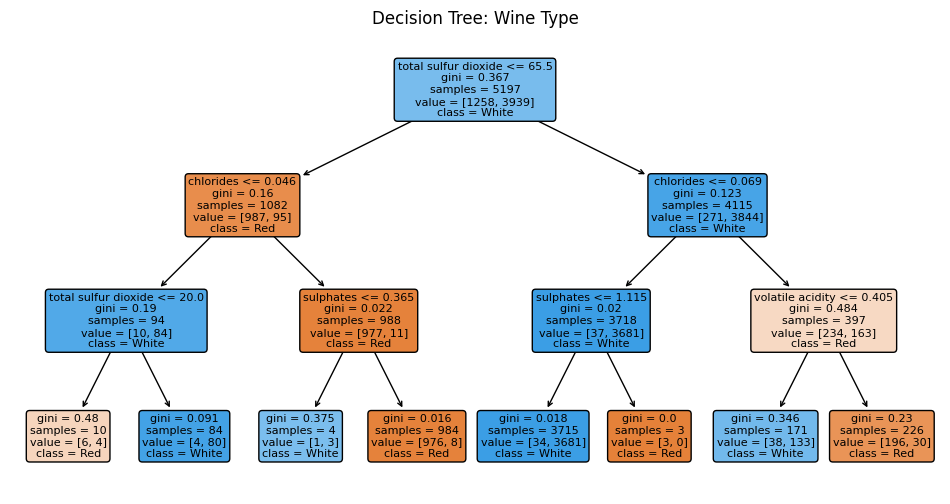

In [49]:
plt.figure(figsize=(12, 6))

# Plotting decision tree
plot_tree(model, filled=True, feature_names=x_train_df.columns, rounded=True, fontsize=8, class_names=['Red', 'White'])
plt.title("Decision Tree: Wine Type")
plt.show()


**OBSERVATIONS:** 

**KEY:** [0,1], where the value on left represents Red Wine and Value at right represents White Wine. 
The node is chosen for each level having minimum Gini Index.
The Root Node: (Total sulfur dioxide <= 65.5) suggests left path as 'True' and right path as 'False'. 
Red wines are associated with  total sulfur dioxide <= 65.5, chlorides > 0.046, density > 0.991.
Meanwhile, White wines tend to have total sulfur dioxide > 65.5, chlorides <= 0.069, sulfates <= 1.115.

This suggests that red wines needs less sulphur than white wines, and white wines are generally denser than red wines. This result supports the statements found while searching on the internet.

### **PRUNING** - based on minimum samples in leaf node

In [54]:
# Implementing Decision tree
model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 10)
model.fit(x_train, y_train)

# Assigning columns to data frame
x_train_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

### MODEL EVALUATION:

In [55]:
# Predicting the accuracy and MSE
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

Accuracy: 0.9615384615384616
MSE: 0.038461538461538464


### PLOTTING THE TREE:

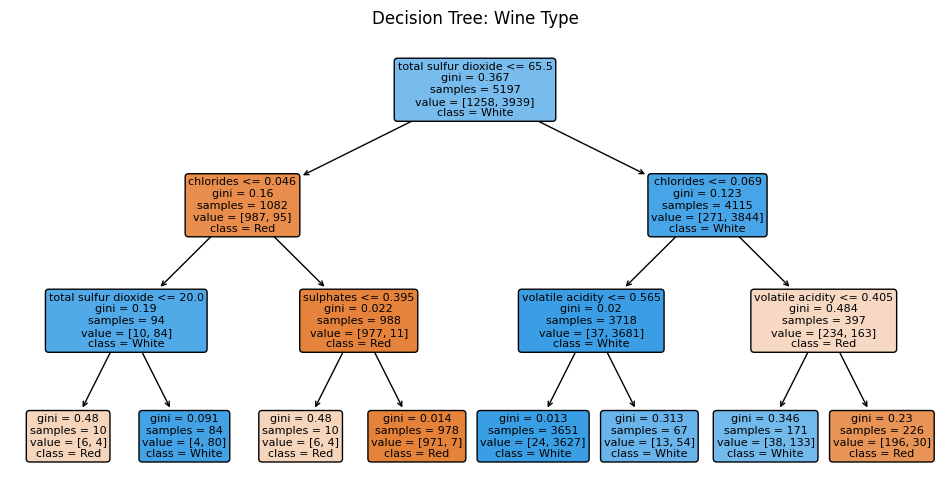

In [52]:
plt.figure(figsize=(12, 6))

# Plotting decision tree
plot_tree(model, filled=True, feature_names=x_train_df.columns, rounded=True, fontsize=8, class_names=['Red', 'White'])
plt.title("Decision Tree: Wine Type")
plt.show()

**OBSERVATIONS:** By applying the min_samples_leaf = 10, the nodes branching out to leaf nodes having sample size less than 10 changes. Comparing this graph from above obtained, the threshold for sulphates changes from 0.365 to 0.395, classifying now more number of sample. Similarly, the node for sulphates <= 1.115 changes its attribute to volatile acidity <= 0.565 splitting now into larger samples of 3651 and 67. Increasing the sample sizes leads to a more confident interval.

### CONFUSION MATRIX

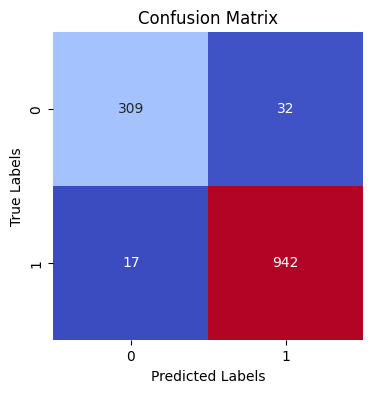

In [115]:
# Calculating and plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### CALCULATING RECALL VALUES

In [116]:
recall_white = np.round(309/(309+32), 4)
precision_white = np.round(309/(309+17), 4)

recall_red = np.round(942/(942+17), 4)
precision_red = np.round(942/(942+32), 4)

print("Recall for White Wine:", recall_white)
print("Precision for White Wine:", precision_white)

print("Recall for Red Wine:", recall_red)
print("Precision for Red Wine:", precision_red)

Recall for White Wine: 0.9062
Precision for White Wine: 0.9479
Recall for Red Wine: 0.9823
Precision for Red Wine: 0.9671


**OBSERVATIONS:** According to the confusion matrix, the decision tree model has a precision rate of 0.9479, suggesting that from the cases predicted as positive (wine type is White), 94.79% of them are actually White wine. Meanwhile, the model has a recall rate of 0.9062, meaning that among all White wine cases, 90.62% of them are predicted correctly. For Red wine, the recall rate is 0.9823 and the precision rate is 0.9671.

## **STEP 3:** 
### Decision trees were also used to check the nodes helpful in splitting for quality level classification:
---------------------------------------------------------------------------------------------------------------------------------------------

## **DECISION TREE: QUALITY**

The model is now checked with quality_level as the classification O with level 1, 2 and 3.

**INTERPRETATION:**
1. The Accuracy of 0.93 infers that the model correctly predicts approx 93.0% of the label from the total predictions. 

In [66]:
# Initialising the variables and splitting the dataset into test and train
y_q = wine_quality_encoded['quality_level']
x_q = wine_quality_encoded.drop(['quality_level', 'quality'], axis=1)

x_q_train, x_q_test, y_q_train, y_q_test = train_test_split(x_q, y_q, test_size=0.2, random_state=42)

In [118]:
# Implementing Decision tree
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(x_q_train, y_q_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### MODEL EVALUATION:

In [119]:
y_q_pred = model.predict(x_q_test)
accuracy_q = accuracy_score(y_q_test, y_q_pred)
class_report = classification_report(y_q_test, y_q_pred)

# Printing accuracy and classification report
print(f"Accuracy: {accuracy_q}")
print(class_report)

Accuracy: 0.9307692307692308
              precision    recall  f1-score   support

           1       0.40      0.04      0.07        49
           2       0.94      0.99      0.96      1214
           3       0.20      0.03      0.05        37

    accuracy                           0.93      1300
   macro avg       0.51      0.35      0.36      1300
weighted avg       0.89      0.93      0.90      1300



### PLOTTING DECISION TREE

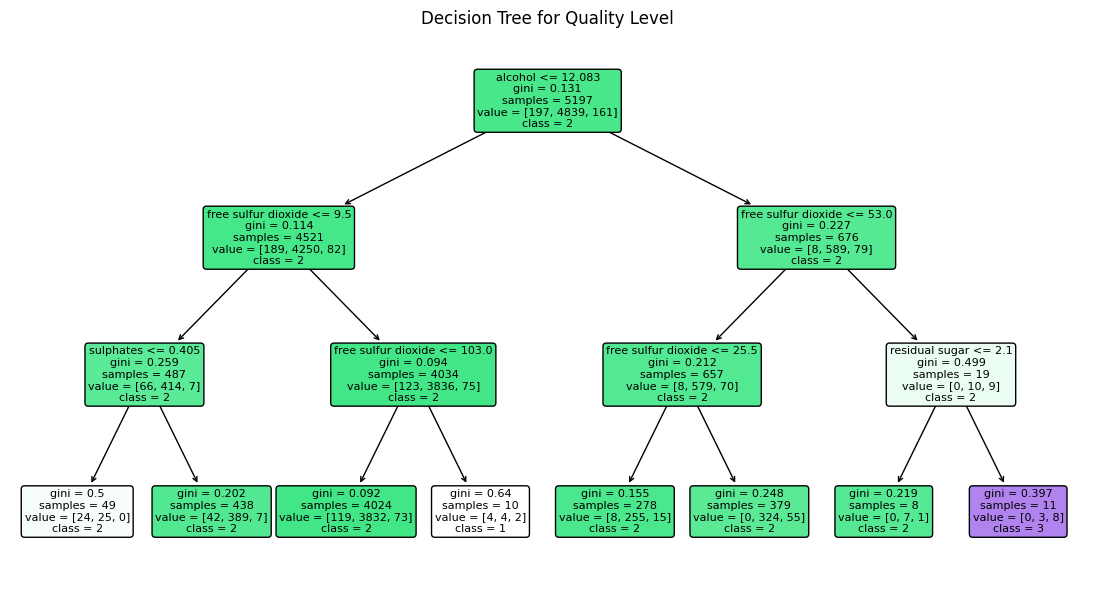

In [120]:
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
plot_tree(model, filled=True, feature_names=x_q_train.columns, rounded=True,fontsize=8, class_names=['1', '2', '3'])
plt.title("Decision Tree for Quality Level")
plt.tight_layout()
plt.show()

**OBSERVATIONS:**

**KEY:** The Root Node consists of value: alchohol <= 12.083. This suggests that alchol had the minimum gini Index in the respective level.

1. For Level 1 quality, it associates with features including alchohol content <= 12.083 (low alchohol content), free sulfur dioxide <= 9.5 and <= 103 (low free sulfur dioxide content)
2. For Level 2 quality, it tends to have features like alchohol content <= 12.083 (low alchohol content), 0.95 < free sulfur dioxide < 103.
3. For Level 3 quality, the features are alchohol content > 12.083 (high alchohol content), free sulfur dioxide > 53(high free sulfur dioxide content), and residual sugar > 2.1.

### CONFUSION MATRIX

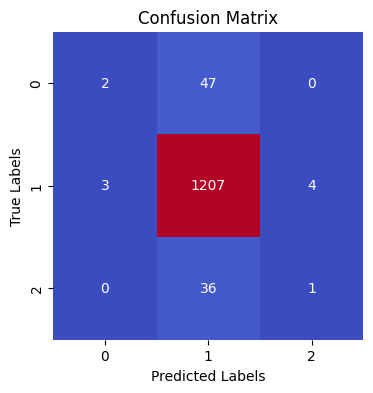

In [121]:
# Calculating and plotting confusion matrix
cm = confusion_matrix(y_q_test, y_q_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**OBSERVATIONS:** According to the confusion matrix and report, the decision tree model has a precision rate of 0.94, suggesting that from the cases predicted as wine of quality level 2, 94% of them are actually level 2 falling between [4,5,6]. Meanwhile, the model has a recall rate of 0.99, meaning that among all level 2 qulity wines, 99% of them are predicted correctly. 

## **STEP 4:** 
### To check how different chemical ingredients contribute to alcohol content, Random Forest was applied. Feature Importance was checked to further investigate the attributes:
---------------------------------------------------------------------------------------------------------------------------------------------

## **RANDOM FOREST**

1. Random forest is a set of decision trees having internal and leaf nodes.
2. In the internal node, the features are selected based on criteria such as Gini Index or Information Gain.
3. The decrease in impurity is calculated by subtracting initial impurity with the weighted impurity in child nodes. The node with highest decrease is selected.
4. The average over all the tress in forest gives the Feature Importance.

### What chemical ingredients contribute to alcohol?

To check how chemical ingredients selected effects the alcohol content of the wines.

In [56]:
# Selecting chemicals list and displaying the data frame
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Type', 'quality_level'],
      dtype='object')

In [57]:
columns_selected = ['alcohol', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']
chemicals = wine_quality[columns_selected]
chemicals.head()

,alcohol,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates
0,9.4,0.00,1.9,0.076,11.0,34.0,0.56
1,9.8,0.00,2.6,0.098,25.0,67.0,0.68
2,9.8,0.04,2.3,0.092,15.0,54.0,0.65
3,9.8,0.56,1.9,0.075,17.0,60.0,0.58
4,9.4,0.00,1.9,0.076,11.0,34.0,0.56


In [58]:
# Initialising variables and fitting the model
x = chemicals.drop('alcohol', axis=1)
y = chemicals['alcohol']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(random_state=42)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
# Extracting the Feature importance
importances = regressor.feature_importances_
featureNames = np.array(list(x_train.columns))

featureImportancedf = pd.DataFrame({'Features': featureNames, 'Importance': importances})
featureImportancedf = featureImportancedf.sort_values(by='Importance', ascending=False)
print(featureImportancedf)

               Features  Importance
2             chlorides    0.323264
1        residual sugar    0.226522
4  total sulfur dioxide    0.143963
5             sulphates    0.114566
0           citric acid    0.108611
3   free sulfur dioxide    0.083074


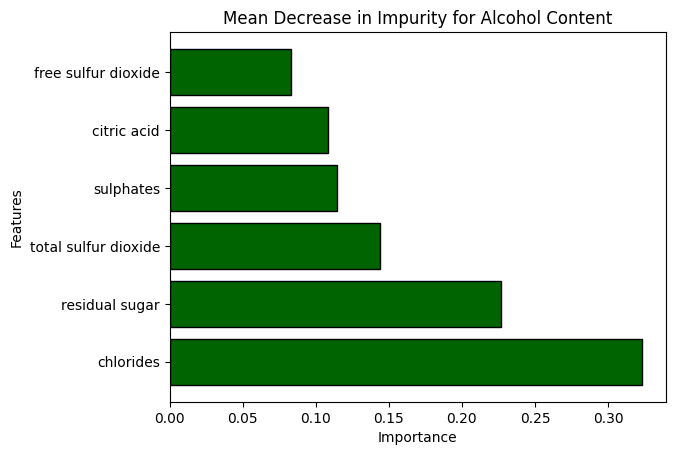

In [60]:
# Using barh for horizontal plot
plt.barh(featureImportancedf['Features'], featureImportancedf['Importance'], color = 'darkgreen', edgecolor = 'black')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Mean Decrease in Impurity for Alcohol Content')
plt.show()

**OBSERVATIONS:** The graph suggests that Chlorides, Residual sugar, and Total Sulfur dioxide are the top 3 chemicals that contribute to alcohol content.

**SUGGESTIONS:** Since the previous decision tree model suggested that Level 3 (the top) Quality tend to have high alcohol content (alcohol>12.083), Chateau could improve wine quality by increasing the content of Chlorides, Residual sugar, and total sulfur dioxide.

## **STEP 5:** 
### Similarly, important attributes were checked for Type of Wine and Quality Level with Random Forest:
---------------------------------------------------------------------------------------------------------------------------------------------

## **RANDOM FOREST - WINE TYPE**

In [61]:
# Initialising the variables and splitting the dataset into test and train
y = wine_quality_encoded['Type']
x = wine_quality_encoded.drop(['Type', 'quality_level'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
# Running model 
classifier = RandomForestClassifier(random_state=42) 
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

### MODEL EVALUATION

In [63]:
accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report\n",class_report)

Accuracy: 0.9946153846153846
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       341
           1       0.99      1.00      1.00       959

    accuracy                           0.99      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



### PLOTTING CONFUSION MATRIX

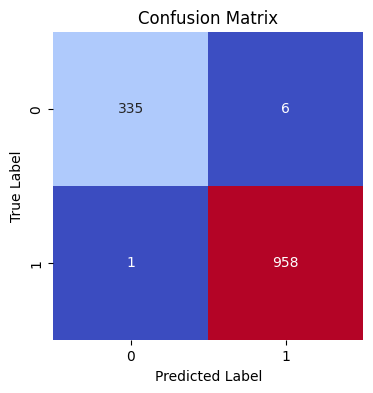

In [130]:
matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(4, 4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### PERMUTATION IMPORTANCE

                Features  Importance
6   total sulfur dioxide    0.085769
4              chlorides    0.042769
7                density    0.016846
1       volatile acidity    0.011923
8                     pH    0.004923
9              sulphates    0.004077
0          fixed acidity    0.003154
3         residual sugar    0.002769
10               alcohol    0.001769
5    free sulfur dioxide    0.001231
2            citric acid    0.000692
11               quality    0.000692


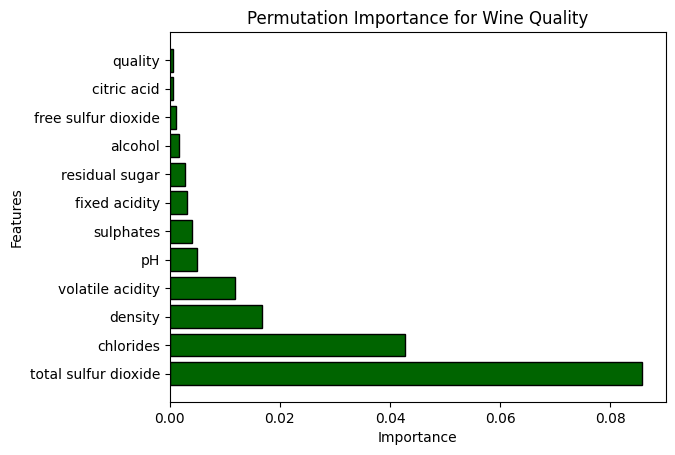

In [64]:
# Executing permutation importance for modelSplit
result = permutation_importance(classifier, x_test, y_test, n_repeats=10, random_state=42)

# Creating datfarame and sorting the values in descending order
permutationImportance = pd.DataFrame({'Features': x.columns, 'Importance': result.importances_mean})
featureImportancedf = permutationImportance.sort_values(by='Importance', ascending=False)
print(featureImportancedf)

# Using barh for horizontal plot
plt.barh(featureImportancedf['Features'], featureImportancedf['Importance'], color = 'darkgreen', edgecolor = 'black')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Permutation Importance for Wine Quality')
plt.show()

**OBSERVATIONS:** After using permutation importance for randomizing and evaluating all feature importance the graph above shows that the most important feature for classifying Red and White wines is the total sulfur dioxide, then chlorides, and density. Sulfur dioxide and chlorides were even used for creating the splitting nodes in decision tree.

## **RANDOM FOREST - QUALITY LEVELS**

In [67]:
# Fitting model
classifier = RandomForestClassifier(random_state=42) 
classifier.fit(x_q_train, y_q_train)
predictions = classifier.predict(x_q_test)

### MODEL EVALUATION:

In [68]:
accuracy = accuracy_score(y_q_test, predictions)
class_report = classification_report(y_q_test, predictions)

print(f"Accuracy: {accuracy}")
print(class_report)

Accuracy: 0.946923076923077
              precision    recall  f1-score   support

           1       0.89      0.16      0.28        49
           2       0.95      1.00      0.97      1214
           3       0.92      0.30      0.45        37

    accuracy                           0.95      1300
   macro avg       0.92      0.49      0.57      1300
weighted avg       0.94      0.95      0.93      1300



### FEATURE IMPORTANCE:

In [69]:
# Extracting Feature importance
importances = classifier.feature_importances_
featureNames = np.array(list(x_q_train.columns))

featureImportancedf = pd.DataFrame({'Features': featureNames, 'Importance': importances})
featureImportancedf = featureImportancedf.sort_values(by='Importance', ascending=False)
print(featureImportancedf)

                Features  Importance
5    free sulfur dioxide    0.107401
1       volatile acidity    0.105767
6   total sulfur dioxide    0.093721
3         residual sugar    0.091779
10               alcohol    0.088830
7                density    0.088287
9              sulphates    0.087588
8                     pH    0.085330
4              chlorides    0.084510
0          fixed acidity    0.082010
2            citric acid    0.077526
11                  Type    0.007252


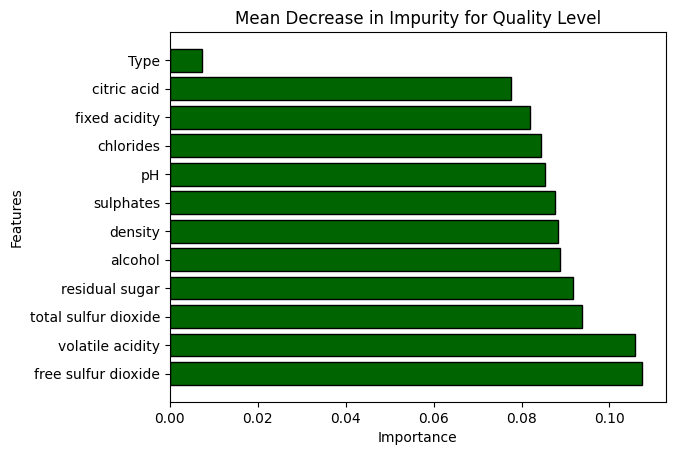

In [70]:
# Using barh for horizontal plot
plt.barh(featureImportancedf['Features'], featureImportancedf['Importance'], color = 'darkgreen', edgecolor = 'black')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Mean Decrease in Impurity for Quality Level')
plt.show()

**OBSERVATIONS:** Among all features, free sulfur dioxide is the most important feature to classify wine's quality levels, but it is not high (just over 0.1). Volatile acidity is the second important feature. However, an interesting find is to see how almost all features shows similar importance. Trying permutation importance to check the importance.

## **STEP 6:** 
### Mean decrease Impurity for Quality levels does not provide clear results or order of Importance. Exploring permutation Importance to check the importance results:
---------------------------------------------------------------------------------------------------------------------------------------------

### PERMUTATION IMPORTANCE:

In [71]:
# Initialising the variables and splitting the dataset into test and train
y_q = wine_quality_encoded['quality_level']
x_q = wine_quality_encoded.drop(['quality_level', 'quality'], axis=1)

x_q_train, x_q_test, y_q_train, y_q_test = train_test_split(x_q, y_q, test_size=0.2, random_state=42)

In [72]:
# Executing permutation importance for modelSplit
result = permutation_importance(classifier, x_q_test, y_q_test, n_repeats=10, random_state=42)

# Creating datfarame and sorting the values in descending order
permutationImportance = pd.DataFrame({'Features': x_q.columns, 'Importance': result.importances_mean})
featureImportancedf = permutationImportance.sort_values(by='Importance', ascending=False)
print(featureImportancedf)

                Features  Importance
10               alcohol    0.009538
5    free sulfur dioxide    0.008077
1       volatile acidity    0.007615
9              sulphates    0.006231
7                density    0.005923
4              chlorides    0.004462
3         residual sugar    0.004154
0          fixed acidity    0.002769
2            citric acid    0.002154
6   total sulfur dioxide    0.002000
8                     pH    0.001385
11                  Type    0.000615


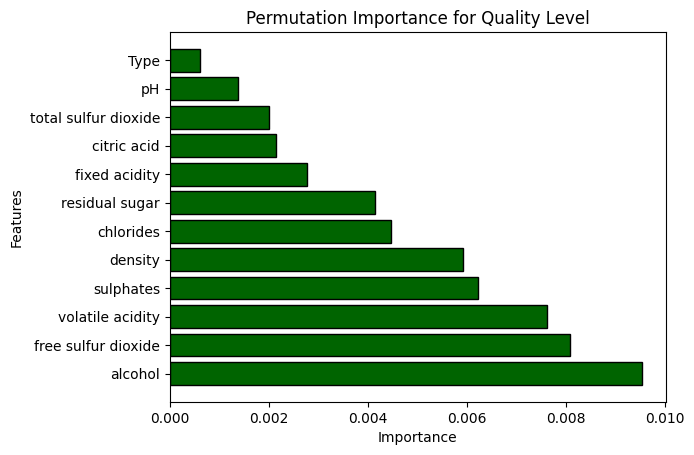

In [73]:
# Using barh for horizontal plot
plt.barh(featureImportancedf['Features'], featureImportancedf['Importance'], color = 'darkgreen', edgecolor = 'black')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Permutation Importance for Quality Level')
plt.show()

**OBSERVATIONS:** The graph suggests now that alcohol is the highest followed by sulfur dioxide to determine the quality_level.

## **STEP 7:** 
### To check how different columns such as 'pH', 'sulphates' and 'Density' vary with clusters = 2. The idea is to group the basis, and seggregate White Wine and Red Wine on these properties:
---------------------------------------------------------------------------------------------------------------------------------------------

## **K-MEANS CLUSTER**

Creating a dataframe for the scaled values and assigning it to the respective columns. The attributes 'ph', 'Sulphates' and 'Density' are then selected from the dataframe.

This is done to check how these attributes affects the wine type 'Red' or 'White'. According to the study, Red wines need less sulphur than white wines whereas white wines are denser as it contains more sugars. Additionally, White wines are usually more acidic, falling between 3.0 to 3.4 and Red wines fall between 3.3 and 3.6.

In [139]:
x_train_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.468229,-0.599512,0.205467,0.464612,-0.712801,0.311659,0.343566,-0.296146,-0.168884,-1.083266,0.013766,-0.929206
1,0.851500,-0.352849,1.104063,-0.702999,1.067470,-1.408735,-1.847518,-0.203072,0.269679,0.598577,1.608717,1.352431
2,0.385713,2.329612,-2.144710,-0.702999,0.234762,0.024927,-1.295294,-0.326062,1.209455,0.262208,1.105048,0.211612
3,-1.555065,0.202143,0.067221,-0.890650,-0.798944,-1.007309,-0.618374,-1.492810,0.958848,-1.015992,1.021103,0.211612
4,-0.468229,-0.476180,1.657046,2.070076,-0.081092,0.082273,0.450448,1.133204,-0.670098,-0.275981,-0.993572,-0.929206
...,...,...,...,...,...,...,...,...,...,...,...,...
5192,0.308082,-0.106186,1.795292,2.351553,-0.167234,0.713085,0.842349,1.731536,-0.419491,0.060387,-1.077517,-0.929206
5193,-1.244540,-0.352849,-0.347516,-0.327695,-0.368233,1.229203,0.753281,-0.887830,0.833544,-0.612350,0.181655,1.352431
5194,-0.623491,0.202143,-0.831376,0.026758,1.756607,1.745321,1.198623,-0.033544,0.144375,-0.679624,-0.825682,-0.929206
5195,-0.545860,-0.476180,1.242309,0.527162,-0.138520,0.885124,1.448015,0.222409,-0.231535,-0.410529,-0.825682,-0.929206


In [140]:
k_cluster = x_train_df[['pH','sulphates','density']]

**CREATING CLUSTERS:** Clusters for White wine are Red wine are created, hence substituting k=2.

**KEY: '0' - Red Wine, '1' - White Wine**

In [141]:
# Creating clusters with k=2
kmeans = KMeans(2, random_state=42)

kmeans.fit(k_cluster)
k_cluster.head()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,pH,sulphates,density
0,-0.168884,-1.083266,-0.296146
1,0.269679,0.598577,-0.203072
2,1.209455,0.262208,-0.326062
3,0.958848,-1.015992,-1.492810
4,-0.670098,-0.275981,1.133204


### PLOTTING GRAPHS

1. **pH vs Density**

The graph clusters the common properties together and forms two clusters as specified. It suggest 0, 'Red Wine' having more pH that is white wines are more acidic. However, there is no clear pattern for density.

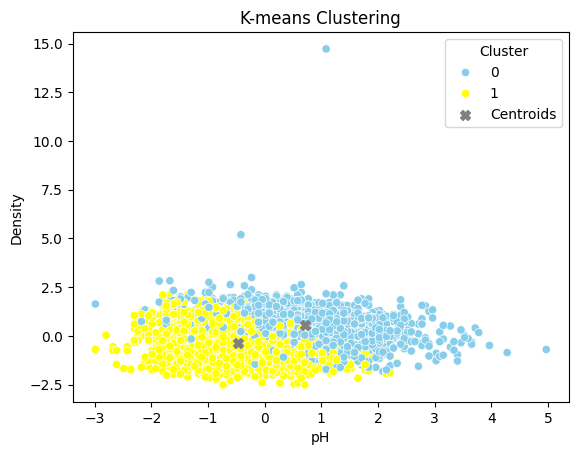

In [142]:
sns.scatterplot(x='pH', y='density', data=k_cluster, hue=kmeans.labels_, palette={0: 'skyblue', 1: 'yellow'}, legend='full')
# Plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=50, c='gray', marker='X', label='Centroids')

plt.xlabel('pH')
plt.ylabel('Density')
plt.title('K-means Clustering')
plt.legend(title='Cluster')
plt.show()

2. **pH vs Sulphates**

The graph again suggest 1, white wines having less pH and are more acidic. But, an interesting observation is  with Red Wine moving towards more Sulphur.

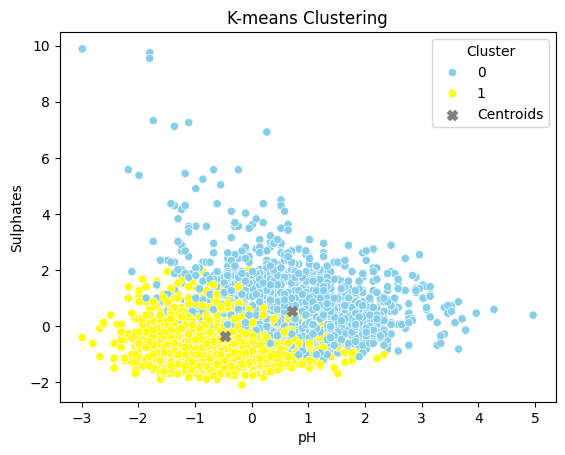

In [143]:
sns.scatterplot(x='pH', y='sulphates', data=k_cluster, hue=kmeans.labels_, palette={0: 'skyblue', 1: 'yellow'}, legend='full')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=50, c='gray', marker='X', label='Centroids')

plt.xlabel('pH')
plt.ylabel('Sulphates')
plt.title('K-means Clustering')
plt.legend(title='Cluster')
plt.show()

3. **Sulphates vs Density**

The graph suggest more sulphur content for Red wines but no specific pattern for density.

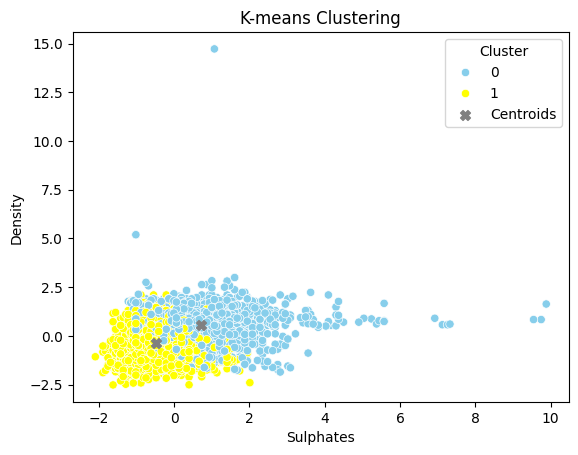

In [144]:
sns.scatterplot(x='sulphates', y='density', data=k_cluster, hue=kmeans.labels_, palette={0: 'skyblue', 1: 'yellow'}, legend='full')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=50, c='gray', marker='X', label='Centroids')

plt.xlabel('Sulphates')
plt.ylabel('Density')
plt.title('K-means Clustering')
plt.legend(title='Cluster')
plt.show()

## **STEP 8:** 
### Predciting the accuracy for the classification model for quality level:
---------------------------------------------------------------------------------------------------------------------------------------------

## **KNN CLASSIFICATION**

To check how quality level is classified further-

Taking all the variables for 'x' independent variable except 'quality' and 'quality_level'. 'quality_level' is dropped since it is itself the predicted variable and quality suggests the same data. The data is then split into training and testing, which is then scaled. knn is used with '3' levels so neighbours is initialised to 3. The accuracy of the model is then predicted.

**OBSERVATIONS:** 
1. The model suggests an accuracy of 92.4%, suggesting that the knn model predicts around 92.4% data points accurately.
2. The report suggests that the out of all the labels, 94% wines predicted as level 2 is actually level 2 wine, whereas 98% are actually level 2 quality wines.

In [145]:
# Initialising variables
x = wine_quality_encoded.drop(columns=['quality','quality_level'])  
y = wine_quality_encoded['quality_level']

# Splitting the data into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardizing features 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [146]:
# Initialising level as 3 for quality level 'y'
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train_scaled, y_train)

y_pred = knn_classifier.predict(x_test_scaled)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9246153846153846


In [147]:
# Printing Classification report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.47      0.16      0.24        49
           2       0.94      0.98      0.96      1214
           3       0.28      0.19      0.23        37

    accuracy                           0.92      1300
   macro avg       0.56      0.44      0.48      1300
weighted avg       0.91      0.92      0.91      1300



## **CONCLUSION:**

With all the research, the project suggests good prediction level for the type of wine given all the chemical compositions. It also pointed out how sulphur dioxide, chlorides, sulphates are important to classify the Red and White Wine. Additionally,it figures best nodes such as alcohol and free sulphur dioxide for quality level by implementing Decision Tree model. For wine producers looking to improve the quality of their offerings, this information may be quite important.

Along with knowing how the classification and regression was done with supervised algorithm, we wanted to deep dive into how chemical ingredients contribute to the alcohol level by using unsupervised model - Random forest. The feature importance suggests that independent variables such as 'Chlorides' and 'Residual Sugar' are the most important features to determine alcohol content.

Further, navigating to the most important feature for wine type using permutation importance after exploring all the attributes - 'total sulphur dioxide' was again identified as one of the important features, and alcohol was for 'quality level'.

An interesting finding was observed using k-means algorithm when the data was clustered in terms of 'pH', 'density' and 'sulphates'. The clusters with two labels for type - 'Red' and 'White' was plotted with white wines forming in the left of x-axis signifying less acidic nature of them. Furthermore, there was a noticeable difference in the way the sulphates were grouped, with red wines having greater sulfate contents.

**RECOMMENDATIONS:**
1. The analysis provides actionable insights for winemakers to enhance production practices and product quality.
2. Producers can modify component selection by realizing the substantial influence of chemical compositions on wine qualities.
3. Additionally, targeted marketing methods could be informed by customer preferences, such as the perception of acidity in red and white wines.
4. Accurate control of product consistency is possible with knowledge of the factors that determine alcohol content.
5. Morever, analyzing clusters of data makes it easier to spot trends and maximize operational effectiveness.